In [5]:
#Made by Kevin Jeryd and Vincent Hellner

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [6]:
df = pd.read_csv('assignment3-data.csv')

In [7]:
df.head()

,residue name,position,chain,phi,psi
0,LYS,10,A,-149.312855,142.657714
1,PRO,11,A,-44.283210,136.002076
2,LYS,12,A,-119.972621,-168.705263
3,LEU,13,A,-135.317212,137.143523
4,LEU,14,A,-104.851467,95.928520


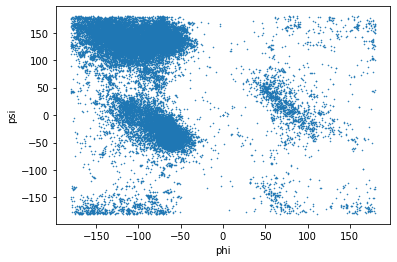

In [8]:
plt.xlabel('phi')
plt.ylabel('psi')
plt.scatter(df['phi'], df['psi'], s=0.3) #phi on X axis psi on Y axis
plt.savefig('scatterDist.png', format='png', dpi=200)
plt.show()

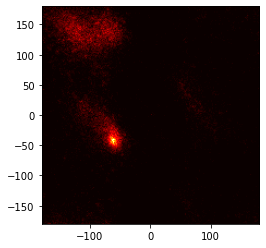

In [9]:
heatmap, xedges, yedges = np.histogram2d(df['phi'], df['psi'], bins=200) #2D histogram used as heatmap
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]] #Using edges to compute the extends

plt.clf()
plt.imshow(heatmap.T, cmap='hot', extent=extent, origin='lower') #Plot the heatmap
plt.savefig('heatDist.png', format='png', dpi=200) #And save it
plt.show()

In [10]:
X = np.vstack((df['phi'], df['psi'])).T #Format the data so it can be used by sklearn

In [42]:
def plot_kmeans(k):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X) #Fit the kmeans model
    plt.xlabel('phi')
    plt.ylabel('psi')
    plt.scatter(df['phi'], df['psi'], s=0.3)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x') #Scatter the cluster centroids as x's
    plt.savefig(f'kmean{k}.png', dpi=200)
    plt.show()

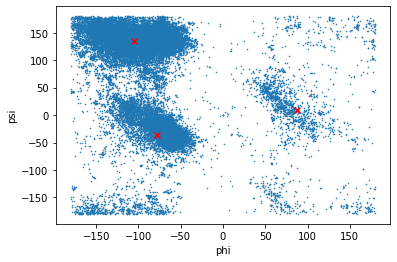

In [12]:
plot_kmeans(3) #Plot data and centroids with K=3

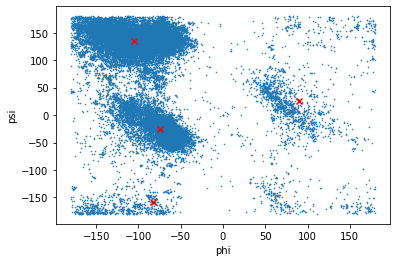

In [13]:
#The group lowest on the image is the same group as the one above
plot_kmeans(4) #Plot data and centroids with K=4

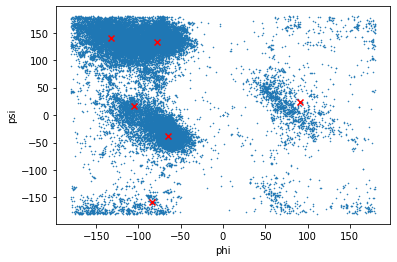

In [14]:
plot_kmeans(6) #Plot data and centroids with K=6

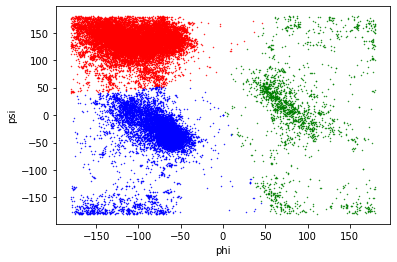

In [43]:
label = KMeans(n_clusters=3, random_state=0).fit_predict(X) 
plt.xlabel('phi')
plt.ylabel('psi')
#Plot points with colours based on their group
plt.scatter(df['phi'][label == 0], df['psi'][label == 0], c='r', s=0.2) 
plt.scatter(df['phi'][label == 1], df['psi'][label == 1], c='b', s=0.2)
plt.scatter(df['phi'][label == 2], df['psi'][label == 2], c='g', s=0.2)
plt.savefig('beta_split.png', dpi=200)
plt.show()

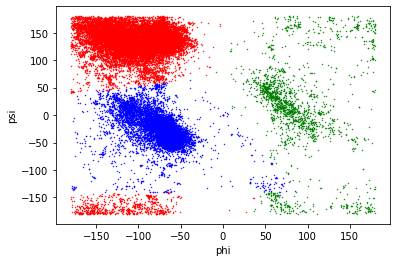

In [16]:
#Shift data to make the lower group part of the upper one
df_copy = df.copy()
df_copy['psi'] += 180 - 40 #+180 to make modulo work correctly and then -40 to shift it down (making the beta group complete)
df_copy['psi'] = df_copy['psi'] % 360 - 180
X_shifted = np.vstack((df_copy['phi'], df_copy['psi'])).T

label = KMeans(n_clusters=3, random_state=0).fit_predict(X_shifted) 
plt.xlabel('phi')
plt.ylabel('psi')
plt.scatter(df['phi'][label == 0], df['psi'][label == 0], c='r', s=0.2)
plt.scatter(df['phi'][label == 1], df['psi'][label == 1], c='b', s=0.2)
plt.scatter(df['phi'][label == 2], df['psi'][label == 2], c='g', s=0.2)
plt.savefig('beta_complete.png', dpi=200)
plt.show()

In [33]:
#Use this method for validation of the clusters
def test_decreased_points(drop_points):
    #Remove 'drop_points' number of points randomly
    dropped_df = df.drop(np.random.choice(df.index, drop_points, replace=False))
    df_copy = dropped_df.copy()
    df_copy['psi'] += 180 - 40 #+180 to make modulo work correctly and then -40 to shift it down (making the beta group complete)
    df_copy['psi'] = df_copy['psi'] % 360 - 180

    X_shifted = np.vstack((df_copy['phi'], df_copy['psi'])).T

    label = KMeans(n_clusters=3, random_state=0).fit_predict(X_shifted) 
    plt.xlabel('phi')
    plt.ylabel('psi')
    plt.scatter(dropped_df['phi'][label == 0], dropped_df['psi'][label == 0], c='r', s=0.2)
    plt.scatter(dropped_df['phi'][label == 1], dropped_df['psi'][label == 1], c='b', s=0.2)
    plt.scatter(dropped_df['phi'][label == 2], dropped_df['psi'][label == 2], c='g', s=0.2)
    plt.savefig(f'validate{drop_points}.png', dpi=200)
    plt.show()

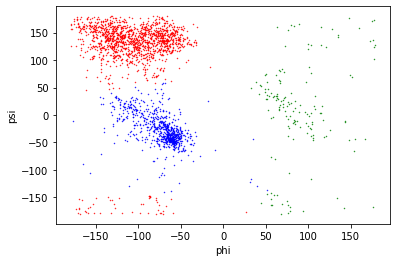

In [37]:
test_decreased_points(27000) #Test clusters where points have decreased by 27000

In [ ]:
from sklearn.cluster import DBSCAN

#DBSCAN code from the example
db = DBSCAN(eps=12, min_samples=160).fit(X_shifted) 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) 
core_samples_mask[db.core_sample_indices_] = True 
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_) 
print('Estimated number of noise points: %d' % n_noise_) 

Estimated number of clusters: 3
Estimated number of noise points: 2672


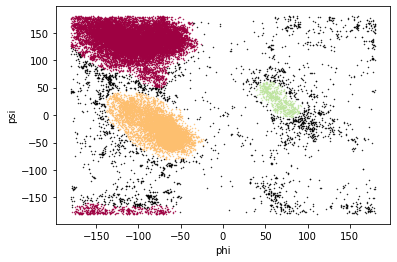

In [ ]:
#Draw the clusters with unique colors based on their label
#(Code is a modified, slightly shorter version of that in the example)
unique_labels = set(labels) 
colors = np.array([plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))])
for k, col in zip(unique_labels, colors): 
    if k == -1: 
        col = np.array([0, 0, 0, 1]) #Outliers/noise
    plt.scatter(df['phi'][labels == k], df['psi'][labels == k], c=col.reshape(1,-1), s=0.2)
plt.xlabel('phi')
plt.ylabel('psi')
plt.savefig('DBSCAN.png', dpi=200)
plt.show() 

In [ ]:
#Count amount of each residue type in noise
import collections
labels, values = zip(*collections.Counter(df['residue name'][labels == -1].to_numpy()).items())

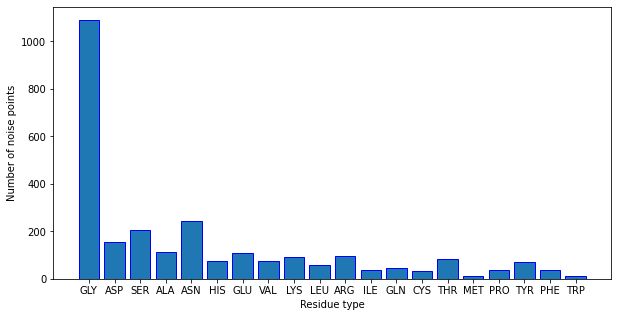

In [ ]:
#Barchart of noise residue type
plt.figure(figsize=(10, 5))
plt.xlabel('Residue type')
plt.ylabel('Number of noise points')
plt.bar(labels, values, linewidth=1, edgecolor='b')
plt.savefig('residuenoise.png', dpi=200)
plt.show()

In [ ]:
#Function for testing different DBSCAN values in order to test its stability to small changes.
def dbscan_test(eps, min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_shifted) 
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool) 
    core_samples_mask[db.core_sample_indices_] = True 
    labels = db.labels_

    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print('Estimated number of clusters: %d' % n_clusters_) 
    print('Estimated number of noise points: %d' % n_noise_) 

    unique_labels = set(labels) 
    colors = np.array([plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))])
    for k, col in zip(unique_labels, colors): 
        if k == -1: 
            col = np.array([0, 0, 0, 1])
        plt.scatter(df['phi'][labels == k], df['psi'][labels == k], c=col.reshape(1,-1), s=0.2)
    plt.xlabel('phi')
    plt.ylabel('psi')
    plt.savefig(f'DBSCAN{eps},{min_samples}.png', dpi=200)
    plt.show() 

Estimated number of clusters: 4
Estimated number of noise points: 2827


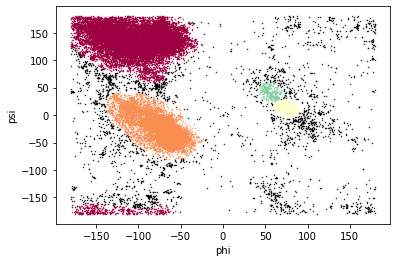

In [ ]:
dbscan_test(12, 170) #Test with eps=12 and min_samples=170 (Increase of 10)

Estimated number of clusters: 3
Estimated number of noise points: 4097


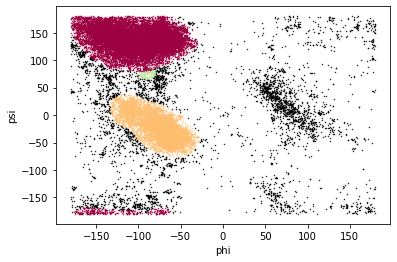

In [ ]:
dbscan_test(10, 160) #Test with eps=10 (decrease of 2) and min_samples=160

In [ ]:
#Function stratifying the data by residue type and plotting its clusters
def plot_residue_type(eps, min_samples, residue_name):
    df_copy = df.copy()
    df_copy['psi'] += 180 - 40 #+180 to make modulo work correctly and then -40 to shift it down (making the beta group complete)
    df_copy['psi'] = df_copy['psi'] % 360 - 180
    df_copy = df_copy.drop(df_copy[df_copy['residue name'] != residue_name].index)
    X_shifted = np.vstack((df_copy['phi'], df_copy['psi'])).T

    df_dropped = df.drop(df[df['residue name'] != residue_name].index)

    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_shifted) 
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool) 
    core_samples_mask[db.core_sample_indices_] = True 
    labels = db.labels_

    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print('Estimated number of clusters: %d' % n_clusters_) 
    print('Estimated number of noise points: %d' % n_noise_)

    unique_labels = set(labels) 
    colors = np.array([plt.cm.get_cmap('plasma')(each) for each in np.linspace(0, 1, len(unique_labels))])
    for k, col in zip(unique_labels, colors): 
        if k == -1: 
            col = np.array([0, 0, 0, 1])
        plt.scatter(df_dropped['phi'][labels == k], df_dropped['psi'][labels == k], c=col.reshape(1,-1), s=0.2)
    plt.xlabel('phi')
    plt.ylabel('psi')
    plt.savefig(f'DBSCAN{residue_name}.png', dpi=200)
    plt.show() 

Estimated number of clusters: 2
Estimated number of noise points: 140


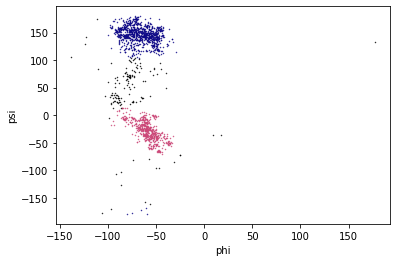

In [ ]:
plot_residue_type(20, 160, 'PRO')

Estimated number of clusters: 1
Estimated number of noise points: 1628


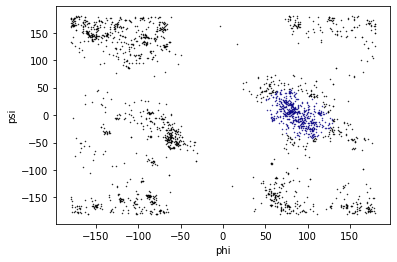

In [ ]:
plot_residue_type(20, 160, 'GLY')

In [41]:
#Validating with Silhouette Coefficient, closer to 1 is good
from sklearn import metrics
from sklearn.metrics import pairwise_distances
df_copy = df.copy()
df_copy['psi'] += 180 - 40 #+180 to make modulo work correctly and then -40 to shift it down (making the beta group complete)
df_copy['psi'] = df_copy['psi'] % 360 - 180
X_shifted = np.vstack((df_copy['phi'], df_copy['psi'])).T
kmeans_model = KMeans(n_clusters=3, random_state=0).fit(X_shifted)
labels = kmeans_model.labels_
metrics.silhouette_score(X_shifted, labels, metric='euclidean')

0.683156495011898

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0fef072a-bdb8-415f-bb29-7cdd9e1af082' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>